In [1]:
import cv2
import numpy as np
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'

In [43]:
min_confidence = 0.14
file_name = "image/marathon_03.jpg"

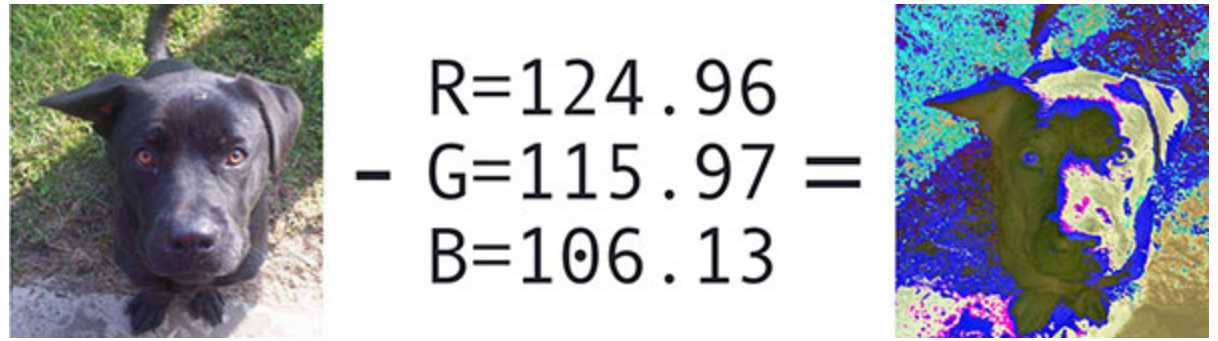

In [44]:
def detectAndDisplay(frame):
    # 카페 모델을 읽어 와서 모델 객체에 저장합니다
    model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)
    # 이미지 사이즈  조정, 노말라이징 실행
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), \
                                                                (104.0, 177.0, 123.0))
    # (104.0, 177.0, 123.0) : RGB값의 일부를 제외해서 dnn이 분석하기 쉽게 단순화
    # 경험적 최적 수치 이므로 사용시 값이 거의 고정된 값으로 사용됨
    # 1.0 : 출력 영상의 픽셀값에 곲할 값. 기본값은 1.0
    # (300, 300) 출력 영상의 크기
    
    model.setInput(blob)
    detections = model.forward()  # 얼굴인식에 의한 리턴값 리스트 
    
    print(detections.shape)
    print(detections[0])
    
    # 얻어온 값을 이용하여 반복 실행
    for i in range(0, detections.shape[2]):
        # 대상 박스가 얼굴일 확율 추출
        confidence = detections[0, 0, i, 2]
        # 0.3 보다 확율이 높다면 박스 표시 및 확율 표시
        if confidence > min_confidence:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            # 3:7 : 3, 4, 5, 6 인덱스 : 박스가 그림상의 위치한 가로세로 상대 위치값
            (startX, startY, endX, endY) = box.astype("int")
            # print(confidence, startX, startY, endX, endY)
            
            text = "{:.2f}%".format(confidence * 100)
            # 박스가 너무 위에 있어서 확율 표시가 어렵다면 박스위말고 안쪽에 확율표시
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.imshow("Face Detection by dnn", frame)

In [ ]:
img = cv2.imread(file_name)
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))
(height, width) = img.shape[:2]

# cv2.imshow("Original Image", img)
detectAndDisplay(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

width: 707 pixels
height: 1057 pixels
channels: 3
(1, 1, 200, 7)
[[[0.         1.         0.9916431  ... 0.12951218 0.58402306 0.21461089]
  [0.         1.         0.8958832  ... 0.2710814  0.17847122 0.34904397]
  [0.         1.         0.29054815 ... 0.24181008 0.9564552  0.31959093]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]]
